# Financial PhraseBank Dataset EDA - 4 Agreement Levels

This notebook performs comprehensive Exploratory Data Analysis on the Financial PhraseBank dataset from Hugging Face:
https://huggingface.co/datasets/takala/financial_phrasebank

## Dataset Overview
- **sentences_50agree**: 4,846 instances with >=50% annotator agreement
- **sentences_66agree**: 4,217 instances with >=66% annotator agreement  
- **sentences_75agree**: 3,453 instances with >=75% annotator agreement
- **sentences_allagree**: 2,264 instances with 100% annotator agreement

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import load_dataset
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

import nltk
nltk_resources = ['punkt', 'stopwords']
for resource in nltk_resources:
    try:
        # Check if resource exists
        nltk.data.find(f'tokenizers/{resource}')
        print(f"NLTK resource '{resource}' is already downloaded.")
    except LookupError:
        print(f"Downloading NLTK resource: {resource}")
        nltk.download(resource)
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

NLTK resource 'punkt' is already downloaded.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Jayden\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## 1. Data Loading and Initial Exploration

In [3]:
# Load all 4 agreement levels
datasets = {}
agreement_levels = ['sentences_50agree', 'sentences_66agree', 'sentences_75agree', 'sentences_allagree']
expected_counts = [4846, 4217, 3453, 2264]

print("Loading Financial PhraseBank datasets...")
for level in agreement_levels:
    try:
        dataset = load_dataset("takala/financial_phrasebank", level)
        datasets[level] = dataset['train'].to_pandas()
        print(f" {level}: {len(datasets[level])} instances loaded")
    except Exception as e:
        print(f" Error loading {level}: {e}")

print("\nDataset loading complete!")

Loading Financial PhraseBank datasets...
 sentences_50agree: 4846 instances loaded
 sentences_66agree: 4217 instances loaded
 sentences_75agree: 3453 instances loaded
 sentences_allagree: 2264 instances loaded

Dataset loading complete!


## 2. Dataset Size and Agreement Level Analysis

In [4]:
# Create summary statistics
summary_data = []
for i, level in enumerate(agreement_levels):
    if level in datasets:
        df = datasets[level]
        summary_data.append({
            'Agreement Level': level.replace('sentences_', '').replace('agree', '% agree'),
            'Count': len(df),
            # 'Expected Count': expected_counts[i],
            # 'Match Expected': len(df) == expected_counts[i]
        })

summary_df = pd.DataFrame(summary_data)
print("Dataset Size Summary:")
print(summary_df.to_string(index=False))

df.head(5)

Dataset Size Summary:
Agreement Level  Count
      50% agree   4846
      66% agree   4217
      75% agree   3453
     all% agree   2264


,sentence,label
0,"According to Gran , the company has no plans t...",1
1,"For the last quarter of 2010 , Componenta 's n...",2
2,"In the third quarter of 2010 , net sales incre...",2
3,Operating profit rose to EUR 13.1 mn from EUR ...,2
4,"Operating profit totalled EUR 21.1 mn , up fro...",2


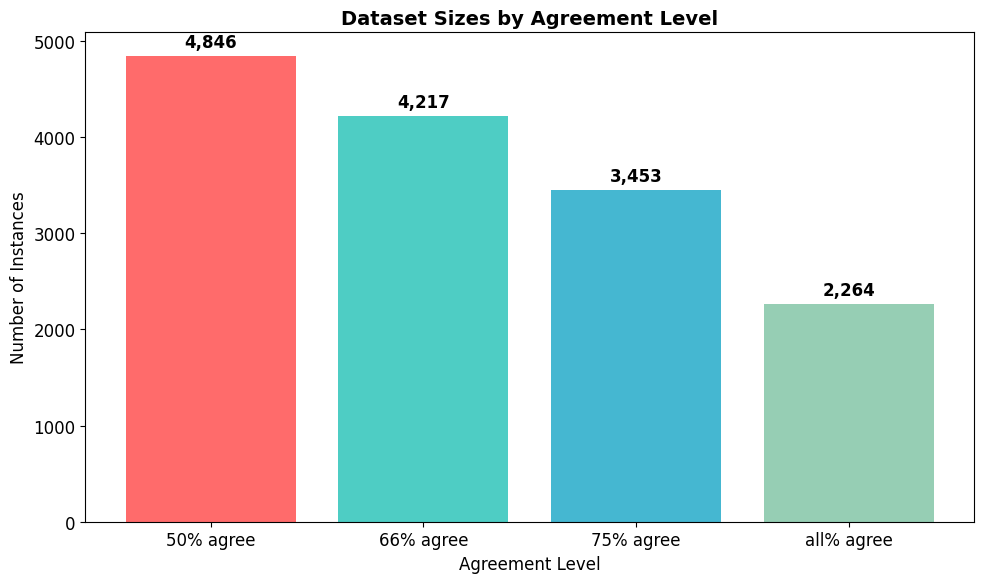

In [5]:
# Visualize dataset sizes (only bar chart)
fig, ax1 = plt.subplots(figsize=(10, 6))  # removed ax2

# Bar chart of dataset sizes
levels = [s.replace('sentences_', '').replace('agree', '% agree') for s in agreement_levels if s in datasets]
counts = [len(datasets[level]) for level in agreement_levels if level in datasets]

bars = ax1.bar(levels, counts, color=['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4'])
ax1.set_title('Dataset Sizes by Agreement Level', fontsize=14, fontweight='bold')
ax1.set_ylabel('Number of Instances')
ax1.set_xlabel('Agreement Level')

# Add value labels on bars
for bar, count in zip(bars, counts):
    height = bar.get_height()
    ax1.text(bar.get_x() + bar.get_width()/2., height + 50,
             f'{count:,}', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()


## 3. Sentiment Label Distribution Analysis

In [6]:
# Analyze sentiment distribution for each agreement level
sentiment_analysis = {}

print("Sentiment Distribution Analysis:")
print("=" * 50)

for level in agreement_levels:
    if level in datasets:
        df = datasets[level]
        sentiment_counts = df['label'].value_counts().sort_index()
        sentiment_analysis[level] = sentiment_counts
        
        # Map numeric labels to sentiment names
        label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}
        sentiment_named = sentiment_counts.rename(index=label_mapping)
        
        print(f"\n{level}:")
        print(sentiment_named)
        print(f"Percentages: {(sentiment_named / sentiment_named.sum() * 100).round(2)}%")

Sentiment Distribution Analysis:

sentences_50agree:
label
Negative     604
Neutral     2879
Positive    1363
Name: count, dtype: int64
Percentages: label
Negative    12.46
Neutral     59.41
Positive    28.13
Name: count, dtype: float64%

sentences_66agree:
label
Negative     514
Neutral     2535
Positive    1168
Name: count, dtype: int64
Percentages: label
Negative    12.19
Neutral     60.11
Positive    27.70
Name: count, dtype: float64%

sentences_75agree:
label
Negative     420
Neutral     2146
Positive     887
Name: count, dtype: int64
Percentages: label
Negative    12.16
Neutral     62.15
Positive    25.69
Name: count, dtype: float64%

sentences_allagree:
label
Negative     303
Neutral     1391
Positive     570
Name: count, dtype: int64
Percentages: label
Negative    13.38
Neutral     61.44
Positive    25.18
Name: count, dtype: float64%


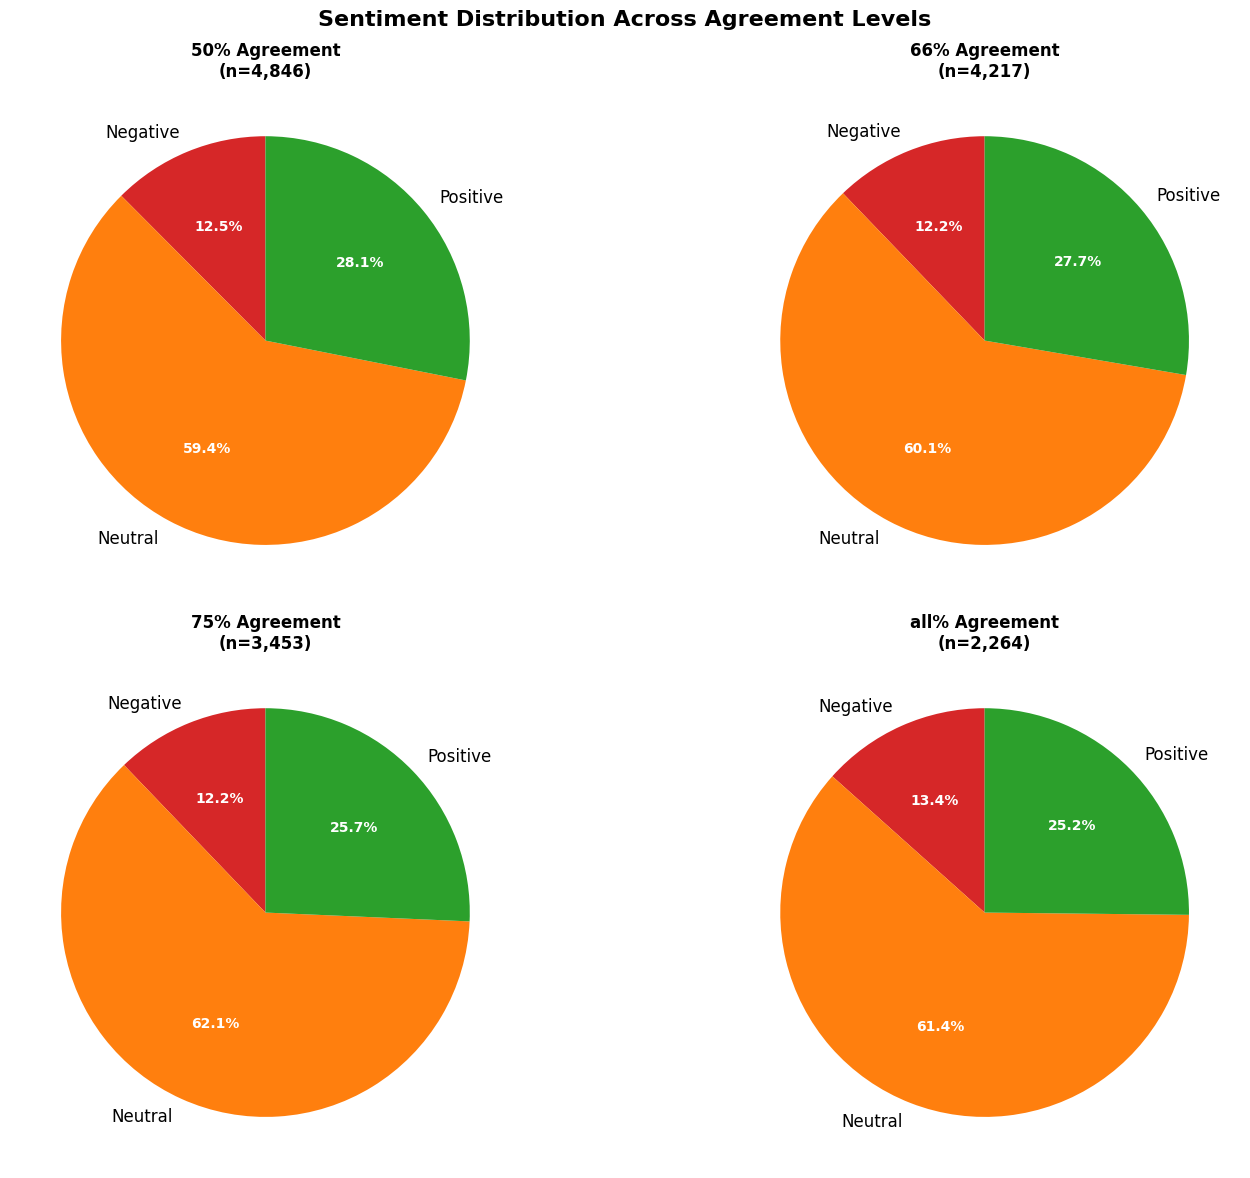

In [7]:
# Create comprehensive sentiment visualization
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#96CEB4']
sentiment_colors = ['#D62728', '#FF7F0E', '#2CA02C']
label_mapping = {0: 'Negative', 1: 'Neutral', 2: 'Positive'}

for i, level in enumerate(agreement_levels):
    if level in datasets and i < 4:
        df = datasets[level]
        sentiment_counts = df['label'].value_counts().sort_index()
        sentiment_named = sentiment_counts.rename(index=label_mapping)
        
        # Create pie chart for each agreement level
        wedges, texts, autotexts = axes[i].pie(sentiment_named.values, 
                                               labels=sentiment_named.index,
                                               autopct='%1.1f%%',
                                               colors=sentiment_colors,
                                               startangle=90)
        
        # Enhance text readability
        for autotext in autotexts:
            autotext.set_color('white')
            autotext.set_fontweight('bold')
            autotext.set_fontsize(10)
        
        title = level.replace('sentences_', '').replace('agree', '% Agreement')
        axes[i].set_title(f'{title}\n(n={len(df):,})', fontsize=12, fontweight='bold')

plt.suptitle('Sentiment Distribution Across Agreement Levels', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [8]:
# Comparative sentiment analysis
sentiment_comparison = pd.DataFrame()

for level in agreement_levels:
    if level in datasets:
        df = datasets[level]
        sentiment_counts = df['label'].value_counts().sort_index()
        sentiment_pct = (sentiment_counts / len(df) * 100).round(2)
        
        level_name = level.replace('sentences_', '').replace('agree', '%')
        sentiment_comparison[level_name] = sentiment_pct.rename(index=label_mapping)

print("Sentiment Distribution Comparison (Percentages):")
print(sentiment_comparison)

Sentiment Distribution Comparison (Percentages):
            50%    66%    75%   all%
label                               
Negative  12.46  12.19  12.16  13.38
Neutral   59.41  60.11  62.15  61.44
Positive  28.13  27.70  25.69  25.18


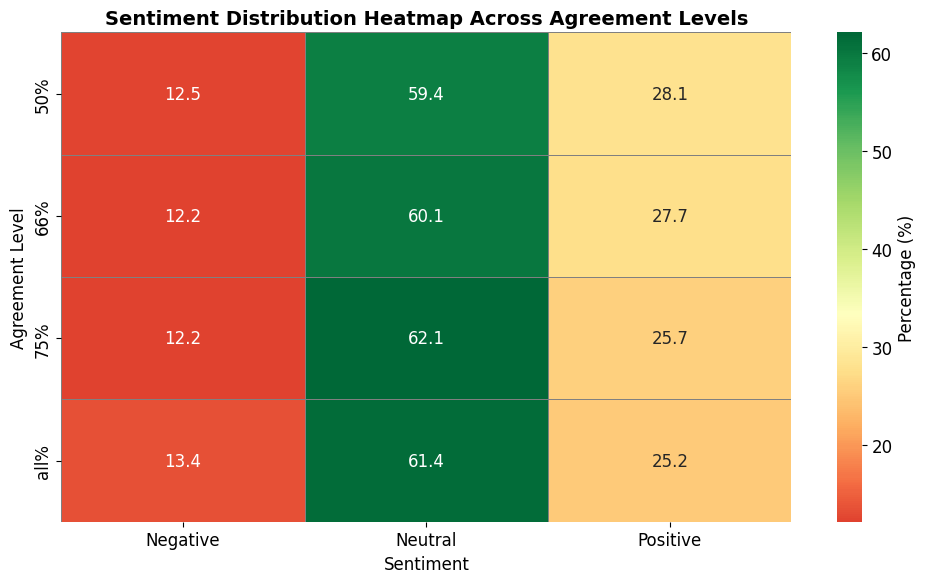

In [9]:
# Heatmap of sentiment distributions
plt.figure(figsize=(10, 6))
sns.heatmap(sentiment_comparison.T, annot=True, cmap='RdYlGn', center=33.33, 
            fmt='.1f', cbar_kws={'label': 'Percentage (%)'}, 
            linewidths=0.5, linecolor='gray')
plt.title('Sentiment Distribution Heatmap Across Agreement Levels', fontsize=14, fontweight='bold')
plt.xlabel('Sentiment')
plt.ylabel('Agreement Level')
plt.tight_layout()
plt.show()

## 4. Text Length Analysis

In [10]:
# Analyze text characteristics
text_stats = []

for level in agreement_levels:
    if level in datasets:
        df = datasets[level]
        
        # Calculate text metrics
        char_lengths = df['sentence'].str.len()
        word_counts = df['sentence'].str.split().str.len()
        
        stats = {
            'Agreement Level': level.replace('sentences_', '').replace('agree', '%'),
            'Avg Char Length': char_lengths.mean(),
            'Std Char Length': char_lengths.std(),
            'Min Char Length': char_lengths.min(),
            'Max Char Length': char_lengths.max(),
            'Avg Word Count': word_counts.mean(),
            'Std Word Count': word_counts.std(),
            'Min Word Count': word_counts.min(),
            'Max Word Count': word_counts.max()
        }
        text_stats.append(stats)

text_stats_df = pd.DataFrame(text_stats)
print("Text Length Statistics:")
print(text_stats_df.round(2))

Text Length Statistics:
  Agreement Level  Avg Char Length  Std Char Length  Min Char Length  \
0             50%           128.13            56.53                9   
1             66%           127.20            56.76                9   
2             75%           124.86            56.44                9   
3            all%           121.96            56.24                9   

   Max Char Length  Avg Word Count  Std Word Count  Min Word Count  \
0              315           23.10            9.96               2   
1              315           23.02           10.04               2   
2              315           22.76           10.07               2   
3              315           22.44           10.15               2   

   Max Word Count  
0              81  
1              81  
2              81  
3              81  


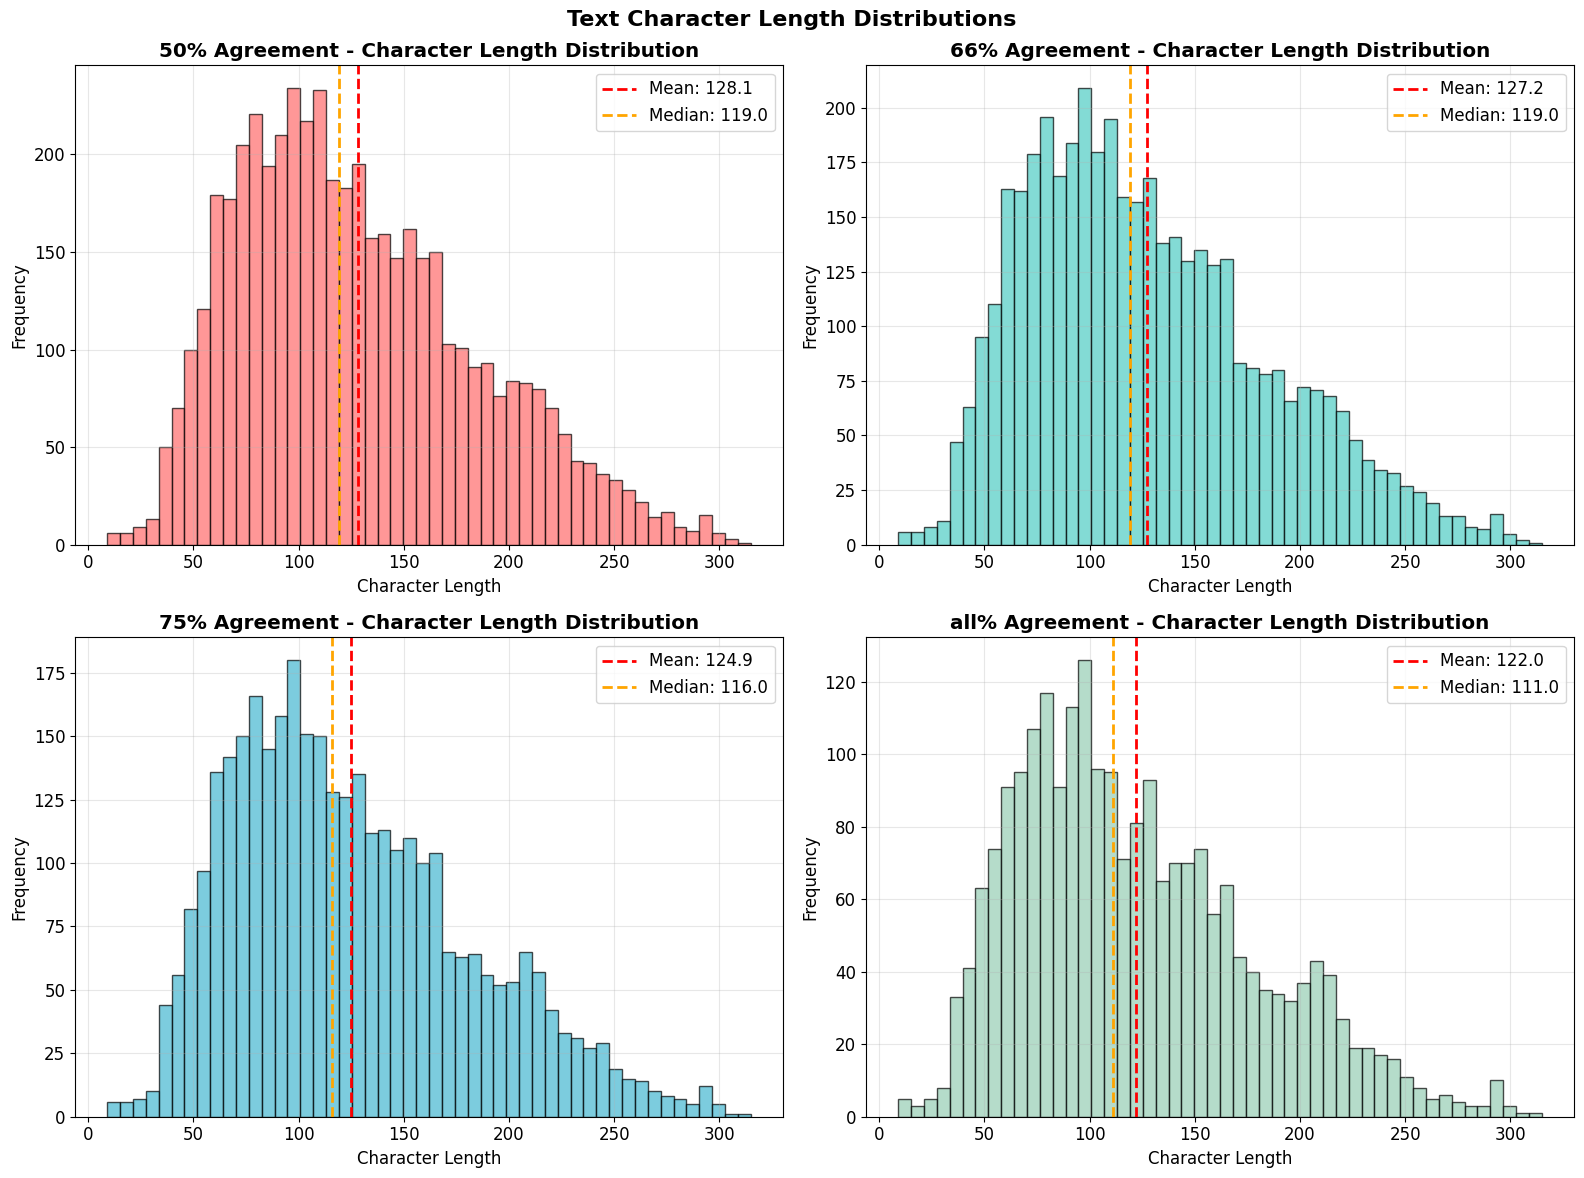

In [11]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Character length distributions
for i, level in enumerate(agreement_levels):
    if level in datasets:
        df = datasets[level]
        char_lengths = df['sentence'].str.len()
        
        row, col = i // 2, i % 2
        axes[row, col].hist(char_lengths, bins=50, alpha=0.7, color=colors[i], edgecolor='black')
        axes[row, col].axvline(char_lengths.mean(), color='red', linestyle='--', linewidth=2, 
                               label=f'Mean: {char_lengths.mean():.1f}')
        axes[row, col].axvline(char_lengths.median(), color='orange', linestyle='--', linewidth=2, 
                               label=f'Median: {char_lengths.median():.1f}')
        
        title = level.replace('sentences_', '').replace('agree', '% Agreement')
        axes[row, col].set_title(f'{title} - Character Length Distribution', fontweight='bold')
        axes[row, col].set_xlabel('Character Length')
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)

plt.suptitle('Text Character Length Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

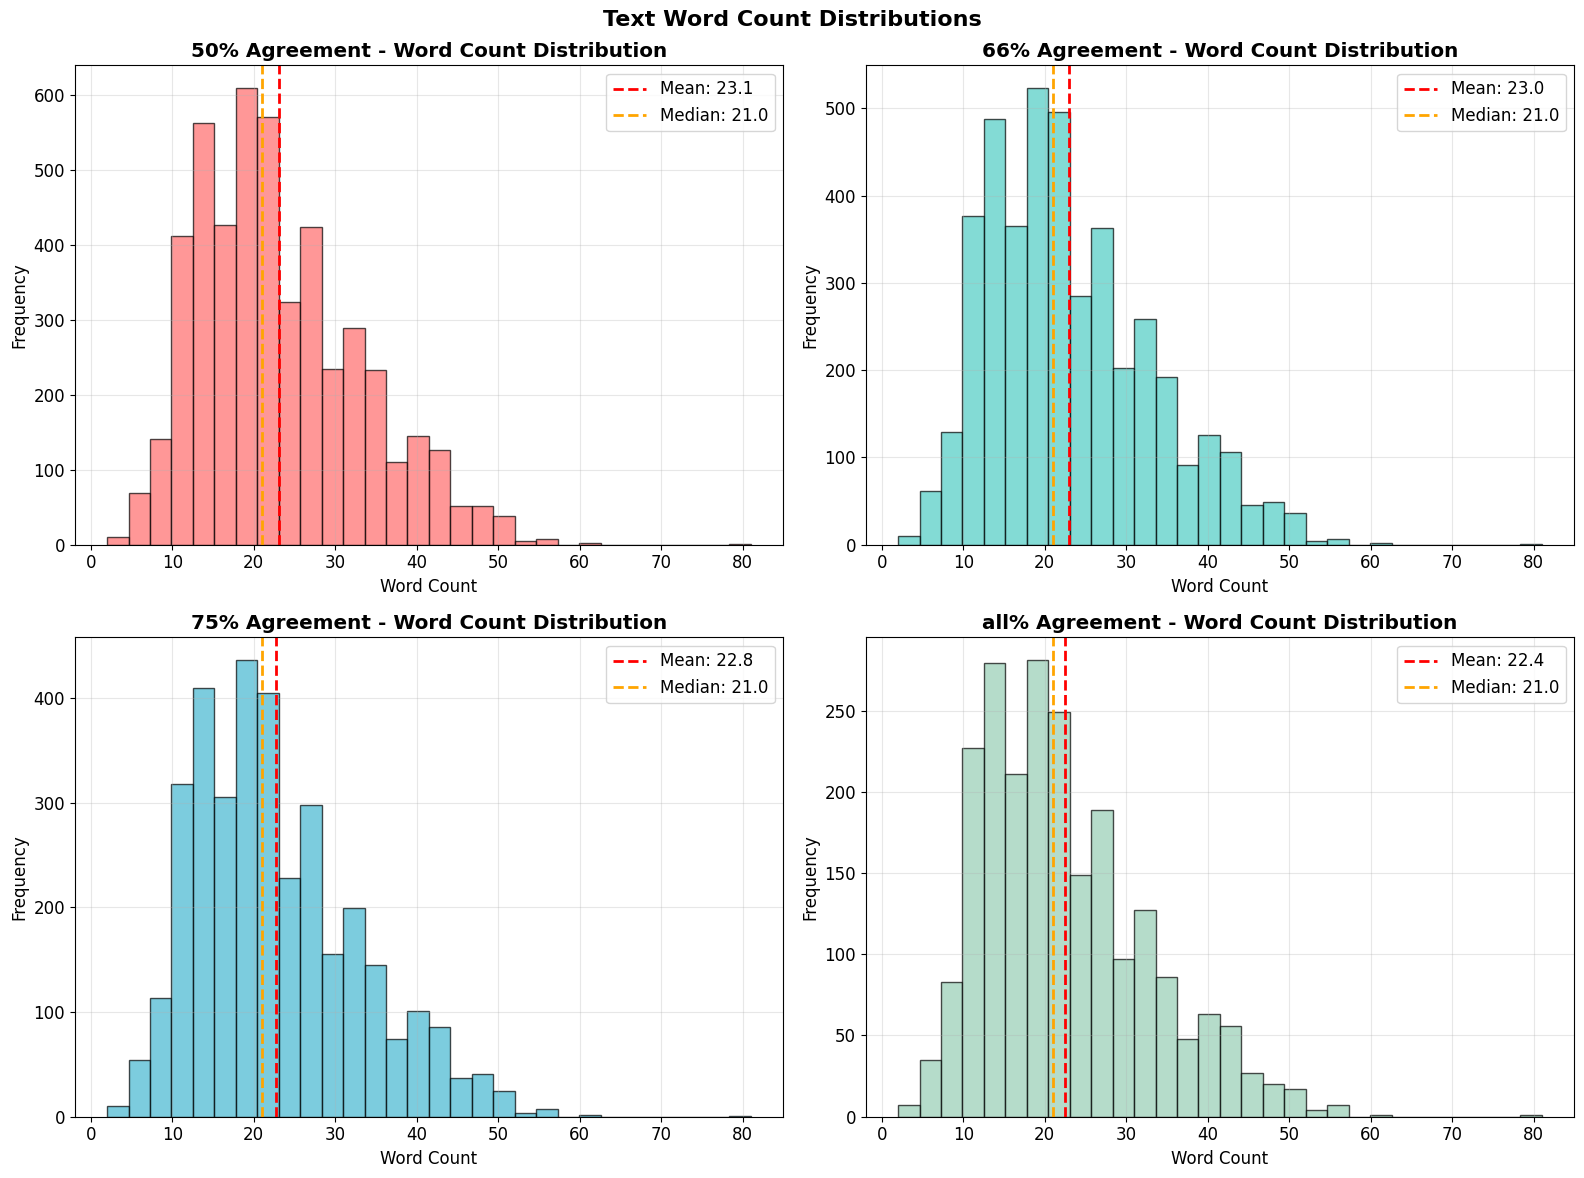

In [12]:
# Word count distributions
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

for i, level in enumerate(agreement_levels):
    if level in datasets:
        df = datasets[level]
        word_counts = df['sentence'].str.split().str.len()
        
        row, col = i // 2, i % 2
        axes[row, col].hist(word_counts, bins=30, alpha=0.7, color=colors[i], edgecolor='black')
        axes[row, col].axvline(word_counts.mean(), color='red', linestyle='--', linewidth=2, 
                               label=f'Mean: {word_counts.mean():.1f}')
        axes[row, col].axvline(word_counts.median(), color='orange', linestyle='--', linewidth=2, 
                               label=f'Median: {word_counts.median():.1f}')
        
        title = level.replace('sentences_', '').replace('agree', '% Agreement')
        axes[row, col].set_title(f'{title} - Word Count Distribution', fontweight='bold')
        axes[row, col].set_xlabel('Word Count')
        axes[row, col].set_ylabel('Frequency')
        axes[row, col].legend()
        axes[row, col].grid(True, alpha=0.3)

plt.suptitle('Text Word Count Distributions', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## 5. Text Content Analysis

In [13]:
# # Sample sentences by sentiment for each agreement level
# print("Sample Sentences by Sentiment and Agreement Level:")
# print("=" * 60)

# for level in agreement_levels:
#     if level in datasets:
#         df = datasets[level]
#         print(f"\n{level.replace('sentences_', '').replace('agree', '% Agreement')}:")
#         print("-" * 40)
        
#         for sentiment_label, sentiment_name in label_mapping.items():
#             if sentiment_label in df['label'].values:
#                 sample = df[df['label'] == sentiment_label]['sentence'].iloc[0]
#                 print(f"\n{sentiment_name}: {sample}")
#         print("\n" + "="*60)

In [14]:
# # Common words analysis
# from collections import Counter
# import re

# def get_common_words(text_series, n=20):
#     """Extract most common words from text series"""
#     all_text = ' '.join(text_series.astype(str)).lower()
#     # Remove special characters and numbers
#     words = re.findall(r'\b[a-zA-Z]{3,}\b', all_text)
#     # Remove common stopwords
#     stopwords = {'the', 'and', 'for', 'are', 'with', 'his', 'they', 'said', 'this', 'have', 'from', 
#                  'that', 'was', 'were', 'been', 'their', 'has', 'had', 'but', 'not', 'all', 'can',
#                  'will', 'one', 'would', 'there', 'who', 'oil', 'get', 'about', 'out', 'what', 'when'}
#     filtered_words = [word for word in words if word not in stopwords]
#     return Counter(filtered_words).most_common(n)

# # Analyze common words for each agreement level
# print("Most Common Words by Agreement Level:")
# print("=" * 50)

# for level in agreement_levels:
#     if level in datasets:
#         df = datasets[level]
#         common_words = get_common_words(df['sentence'], 15)
        
#         print(f"\n{level.replace('sentences_', '').replace('agree', '% Agreement')}:")
#         for word, count in common_words:
#             print(f"  {word}: {count}")

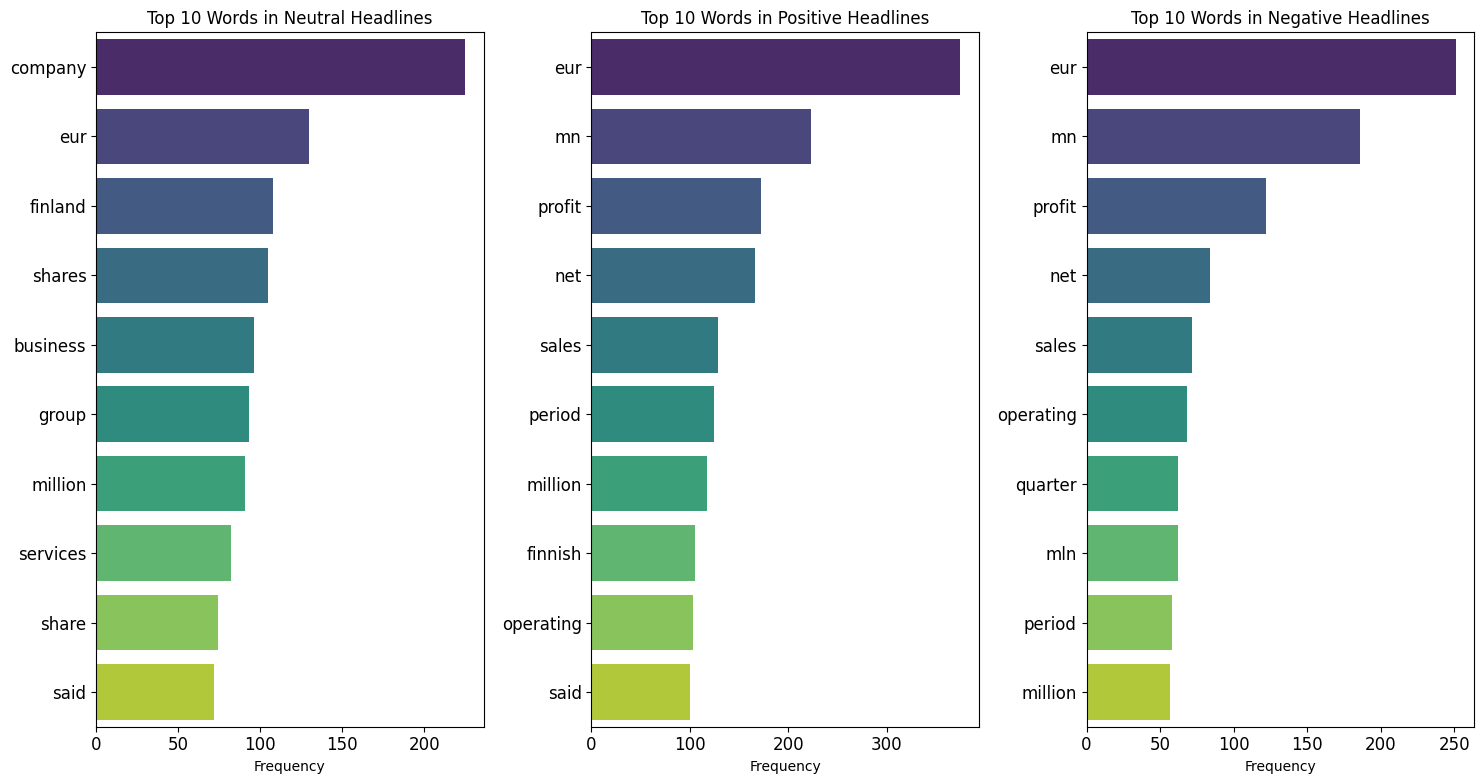

In [15]:
stop_words = set(stopwords.words('english'))

def get_tokens_without_stopwords(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

sentiment_map = {0: "negative", 1: "neutral", 2: "positive"}
df['Sentiment'] = df['label'].map(sentiment_map)

# Analyze keyword frequency for each sentiment
sentiment_words = {}
for sentiment in df['Sentiment'].unique():
    words = []
    for sentence in df[df['Sentiment'] == sentiment]['sentence']:
        tokens = get_tokens_without_stopwords(sentence)
        words.extend(tokens)
    sentiment_words[sentiment] = Counter(words)
    
# Plot the top 10 most frequent words for each sentiment
plt.figure(figsize=(15, 8))
for i, sentiment in enumerate(df['Sentiment'].unique(), 1):
    plt.subplot(1, 3, i)
    top_words = sentiment_words[sentiment].most_common(10)
    words, counts = zip(*top_words)
    sns.barplot(x=list(counts), y=list(words), palette='viridis')
    plt.title(f'Top 10 Words in {sentiment.capitalize()} Headlines', fontsize=12)
    plt.xlabel('Frequency', fontsize=10)
plt.tight_layout()
plt.show()

In [16]:
from wordcloud import WordCloud

sentiment_map = {0: "negative", 1: "neutral", 2: "positive"}
df['Sentiment'] = df['label'].map(sentiment_map)

def get_tokens_without_stopwords(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# Create a function to generate word clouds
def generate_wordcloud(text, title, filename):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=15)
    plt.show()

# Generate word clouds for each sentiment
# for sentiment in df['Sentiment'].unique():
#     text = ' '.join(df[df['Sentiment'] == sentiment]['sentence'])
#     generate_wordcloud(text, f'Word Cloud for {sentiment.capitalize()} Headlines', f'wordcloud_{sentiment}.png')
for sentiment in df['Sentiment'].unique():
    # Get sentences for the current sentiment
    sentiment_sentences = df[df['Sentiment'] == sentiment]['sentence']

    # Apply get_tokens_without_stopwords to each sentence and then join them
    # This is where the stop word removal happens for the word cloud text
    processed_words_for_wc = []
    for sentence in sentiment_sentences:
        processed_words_for_wc.extend(get_tokens_without_stopwords(sentence))

    text_for_wordcloud = ' '.join(processed_words_for_wc)

    # Generate the word cloud using the processed text
    # generate_wordcloud(text_for_wordcloud, f'Word Cloud for {sentiment.capitalize()} Headlines', f'wordcloud_{sentiment}.png')

Words common across >=2 sentiments (to be excluded): {'sector', 'brought', 'limited', 'holdings', 'eur', 'close', 'cut', 'division', 'affecto', 'review', 'amount', 'april', 'anticipated', 'tax', 'coatings', 'tallinn', 'loans', 'mobile', 'focusing', 'china', 'plc', 'yearly', 'compared', 'listed', 'learning', 'commission', 'wholesale', 'cargotec', 'norwegian', 'abp', 'london', 'transactions', 'plastic', 'technology', 'sappi', 'ftse', 'told', 'continue', 'form', 'nok', 'subsidiary', 'maintenance', 'agricultural', 'ixonos', 'association', 'coq', 'elcoteq', 'organization', 'citigroup', 'method', 'personnel', 'reported', 'office', 'poyry', 'estimates', 'ship', 'aluminium', 'release', 'countries', 'software', 'due', 'centre', 'possible', 'permit', 'ac', 'konecranes', 'plan', 'real', 'conducted', 'vessel', 'scanfil', 'vaias', 'department', 'bodies', 'ashley', 'structure', 'items', 'invoice', 'reached', 'meur', 'yards', 'create', 'annually', 'wireless', 'revenue', 'ragutis', 'remain', 'yesterda

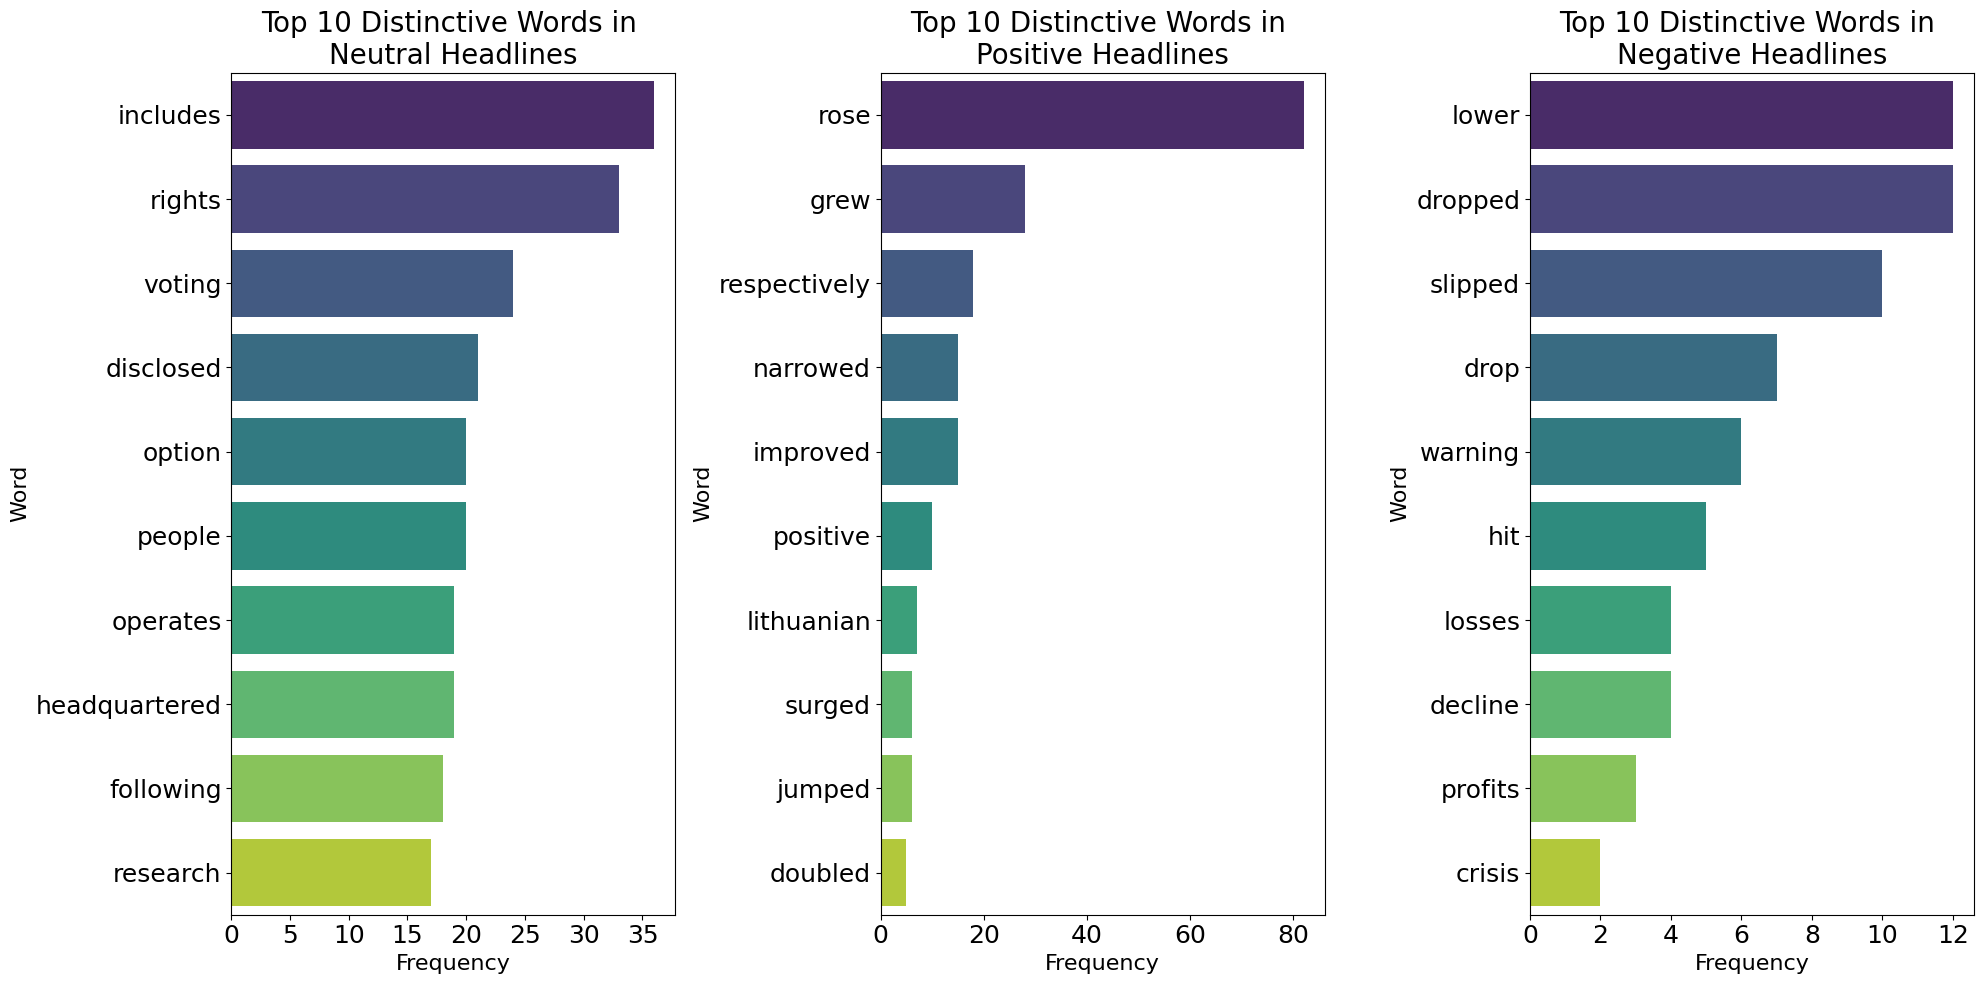

In [23]:
# import pandas as pd
# from collections import Counter
# from nltk.tokenize import word_tokenize
# from nltk.corpus import stopwords
# import matplotlib.pyplot as plt
# import seaborn as sns
# from wordcloud import WordCloud

# FONT SIZE CONFIGURATION - Adjust these values as needed
TITLE_FONT_SIZE = 20
AXIS_LABEL_FONT_SIZE = 16
TICK_LABEL_FONT_SIZE = 18
WORDCLOUD_TITLE_FONT_SIZE = 22
FIGURE_SIZE_BARPLOT = (20, 10)  # Increased for better readability
FIGURE_SIZE_WORDCLOUD = (12, 6)

stop_words = set(stopwords.words('english'))
sentiment_map = {0: "negative", 1: "neutral", 2: "positive"}
df['Sentiment'] = df['label'].map(sentiment_map)

def get_tokens_without_stopwords(text):
    tokens = word_tokenize(text.lower())
    return [word for word in tokens if word.isalpha() and word not in stop_words]

# --- Step 1: Process all words for each sentiment ---
sentiment_processed_words = {}
for sentiment in df['Sentiment'].unique():
    words_list = []
    for sentence in df[df['Sentiment'] == sentiment]['sentence']:
        words_list.extend(get_tokens_without_stopwords(sentence))
    sentiment_processed_words[sentiment] = words_list

# --- Step 2: Identify words common across multiple sentiments ---

# Get a set of unique words for each sentiment
sentiment_unique_word_sets = {
    sentiment: set(words) for sentiment, words in sentiment_processed_words.items()
}

# Find words that appear in ALL sentiments
all_sentiments_words = set.intersection(*sentiment_unique_word_sets.values())

# Alternatively, find words that appear in AT LEAST N sentiments (e.g., 2 or more)
# This is more flexible. Let's find words that appear in 2 or more sentiments.
word_presence_count = Counter()
for s_set in sentiment_unique_word_sets.values():
    for word in s_set:
        word_presence_count[word] += 1

# Define words to exclude (common across many sentiments)
# You can adjust the threshold here.
# For example, exclude words appearing in 2 or more sentiments:
common_across_sentiments_words = {word for word, count in word_presence_count.items() if count >= 2}

# You can also add specific words you observed from the initial bar charts (e.g., 'eur', 'mn')
# if they are consistently high across all categories and you want to remove them.
# common_across_sentiments_words.add('eur')
# common_across_sentiments_words.add('mn')

print(f"Words common across >=2 sentiments (to be excluded): {common_across_sentiments_words}")


# --- Step 3: Plot and Generate Word Clouds with the refined word lists ---

# Plot the top 10 most frequent *distinctive* words for each sentiment
plt.figure(figsize=FIGURE_SIZE_BARPLOT)

refined_sentiment_top_words = {}

for i, sentiment in enumerate(df['Sentiment'].unique(), 1):
    all_words_for_sentiment = sentiment_processed_words[sentiment]

    # Filter out words identified as common across multiple sentiments
    distinctive_words = [
        word for word in all_words_for_sentiment
        if word not in common_across_sentiments_words
    ]

    # Recalculate frequency for distinctive words
    word_counts = Counter(distinctive_words)
    refined_sentiment_top_words[sentiment] = word_counts

    plt.subplot(1, 3, i)
    top_words_to_plot = word_counts.most_common(10) # Get top 10 distinctive words
    if top_words_to_plot:
        words, counts = zip(*top_words_to_plot)
        sns.barplot(x=list(counts), y=list(words), palette='viridis')
        plt.title(f'Top 10 Distinctive Words in \n{sentiment.capitalize()} Headlines', fontsize=TITLE_FONT_SIZE)
        plt.xlabel('Frequency', fontsize=AXIS_LABEL_FONT_SIZE)
        plt.ylabel('Word', fontsize=AXIS_LABEL_FONT_SIZE)
        plt.xticks(fontsize=TICK_LABEL_FONT_SIZE)
        plt.yticks(fontsize=TICK_LABEL_FONT_SIZE)
    else:
        plt.title(f'No Distinctive Words for {sentiment.capitalize()}', fontsize=TITLE_FONT_SIZE)

plt.tight_layout()
plt.show()

# Generate Word Clouds with only distinctive words
def generate_distinctive_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)
    plt.figure(figsize=FIGURE_SIZE_WORDCLOUD)
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=WORDCLOUD_TITLE_FONT_SIZE)
    plt.show()

for sentiment in df['Sentiment'].unique():
    distinctive_words_list = refined_sentiment_top_words[sentiment].keys() # Get just the words
    # Join these distinctive words for the word cloud
    text_for_wordcloud = ' '.join(distinctive_words_list)
    if text_for_wordcloud: # Only generate if there are distinctive words
        # generate_distinctive_wordcloud(text_for_wordcloud, f'Distinctive Word Cloud for {sentiment.capitalize()} Headlines')
        continue  
    else:
        print(f"No distinctive words to generate Word Cloud for {sentiment.capitalize()} Headlines.")

## 7. Key Findings and Recommendations

In [18]:
# Generate comprehensive summary
print("FINANCIAL PHRASEBANK DATASET - EDA SUMMARY")
print("=" * 60)

print("\n1. DATASET OVERVIEW:")
for level in agreement_levels:
    if level in datasets:
        count = len(datasets[level])
        print(f"   {level}: {count:,} instances")

print("\n2. SENTIMENT DISTRIBUTION INSIGHTS:")
for level in agreement_levels:
    if level in datasets:
        df = datasets[level]
        sentiment_counts = df['label'].value_counts().sort_index()
        sentiment_pct = (sentiment_counts / len(df) * 100)
        
        print(f"   {level}:")
        print(f"     Negative: {sentiment_pct[0]:.1f}%")
        print(f"     Neutral:  {sentiment_pct[1]:.1f}%")
        print(f"     Positive: {sentiment_pct[2]:.1f}%")

print("\n3. TEXT CHARACTERISTICS:")
for level in agreement_levels:
    if level in datasets:
        df = datasets[level]
        avg_chars = df['sentence'].str.len().mean()
        avg_words = df['sentence'].str.split().str.len().mean()
        print(f"   {level}: Avg {avg_chars:.0f} chars, {avg_words:.1f} words")

print("\n4. QUALITY TRADE-OFFS:")
print("   - Higher agreement levels = fewer samples but higher quality")
print("   - sentences_allagree: Most reliable but smallest dataset")
print("   - sentences_50agree: Largest dataset but potential noise")
print("   - sentences_75agree: Good balance of size and quality")

print("\n5. RECOMMENDATIONS:")
print("   - For fine-tuning: Start with sentences_75agree or sentences_allagree")
print("   - For data augmentation: Use sentences_50agree with careful validation")
print("   - For evaluation: Use sentences_allagree as gold standard")
print("   - Consider ensemble approach using multiple agreement levels")

print("\n" + "=" * 60)

FINANCIAL PHRASEBANK DATASET - EDA SUMMARY

1. DATASET OVERVIEW:
   sentences_50agree: 4,846 instances
   sentences_66agree: 4,217 instances
   sentences_75agree: 3,453 instances
   sentences_allagree: 2,264 instances

2. SENTIMENT DISTRIBUTION INSIGHTS:
   sentences_50agree:
     Negative: 12.5%
     Neutral:  59.4%
     Positive: 28.1%
   sentences_66agree:
     Negative: 12.2%
     Neutral:  60.1%
     Positive: 27.7%
   sentences_75agree:
     Negative: 12.2%
     Neutral:  62.1%
     Positive: 25.7%
   sentences_allagree:
     Negative: 13.4%
     Neutral:  61.4%
     Positive: 25.2%

3. TEXT CHARACTERISTICS:
   sentences_50agree: Avg 128 chars, 23.1 words
   sentences_66agree: Avg 127 chars, 23.0 words
   sentences_75agree: Avg 125 chars, 22.8 words
   sentences_allagree: Avg 122 chars, 22.4 words

4. QUALITY TRADE-OFFS:
   - Higher agreement levels = fewer samples but higher quality
   - sentences_allagree: Most reliable but smallest dataset
   - sentences_50agree: Largest datas

## 8. Export Summary Statistics

In [19]:
# Create comprehensive summary for export
export_summary = []

for level in agreement_levels:
    if level in datasets:
        df = datasets[level]
        
        # Calculate all metrics
        sentiment_counts = df['label'].value_counts().sort_index()
        sentiment_pct = (sentiment_counts / len(df) * 100).round(2)
        
        char_lengths = df['sentence'].str.len()
        word_counts = df['sentence'].str.split().str.len()
        
        summary_row = {
            'Agreement_Level': level,
            'Instance_Count': len(df),
            'Negative_Pct': sentiment_pct[0],
            'Neutral_Pct': sentiment_pct[1],
            'Positive_Pct': sentiment_pct[2],
            'Avg_Char_Length': char_lengths.mean().round(2),
            'Std_Char_Length': char_lengths.std().round(2),
            'Avg_Word_Count': word_counts.mean().round(2),
            'Std_Word_Count': word_counts.std().round(2),
            'Min_Char_Length': char_lengths.min(),
            'Max_Char_Length': char_lengths.max(),
            'Min_Word_Count': word_counts.min(),
            'Max_Word_Count': word_counts.max()
        }
        export_summary.append(summary_row)

summary_export_df = pd.DataFrame(export_summary)

# Save summary to CSV
summary_export_df.to_csv('financial_phrasebank_eda_summary.csv', index=False)
print("Summary statistics exported to 'financial_phrasebank_eda_summary.csv'")

# Display final summary table
print("\nFinal Summary Table:")
print(summary_export_df.to_string(index=False))

Summary statistics exported to 'financial_phrasebank_eda_summary.csv'

Final Summary Table:
   Agreement_Level  Instance_Count  Negative_Pct  Neutral_Pct  Positive_Pct  Avg_Char_Length  Std_Char_Length  Avg_Word_Count  Std_Word_Count  Min_Char_Length  Max_Char_Length  Min_Word_Count  Max_Word_Count
 sentences_50agree            4846         12.46        59.41         28.13           128.13            56.53           23.10            9.96                9              315               2              81
 sentences_66agree            4217         12.19        60.11         27.70           127.20            56.76           23.02           10.04                9              315               2              81
 sentences_75agree            3453         12.16        62.15         25.69           124.86            56.44           22.76           10.07                9              315               2              81
sentences_allagree            2264         13.38        61.44         25.18 